In [1]:
import math
import numpy as np
import random
import csv
import matplotlib.pyplot as plt
import pandas as pd
import json 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.signal import find_peaks

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from BaselineRemoval import BaselineRemoval
from sklearn.metrics import mean_squared_error

from scipy import signal
from sklearn.tree import DecisionTreeRegressor 

from scipy.signal import argrelextrema
from sklearn.preprocessing import PolynomialFeatures
from scipy import interpolate
import bisect

In [2]:
SSW1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#37 SSW1.csv.csv")
SSW2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#38 SSW2.csv.csv")
SSW3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#39 SSW3.csv.csv")
SSW4 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#40 SSW4.csv.csv")
SSW5 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#41 SSW5.csv.csv")

In [3]:
#Loading the corresponding force data
force_SSW1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#37 SSW1.log" , delimiter = "\t")
force_SSW2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#38 SSW2.log" , delimiter = "\t")
force_SSW3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#39 SSW3.log" , delimiter = "\t")
force_SSW4 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#40 SSW4.log" , delimiter = "\t")
force_SSW5 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#41 SSW5.log" , delimiter = "\t")

In [4]:
#Visulizing the force data - test #2 - 6 - NE1-5
plt.figure(figsize=(50, 30))

#Time for force
x_force_SSW1 = force_SSW1["Time"]
x_force_SSW2 = force_SSW2["Time"]
x_force_SSW3 = force_SSW3["Time"]
x_force_SSW4 = force_SSW4["Time"]
x_force_SSW5 = force_SSW5["Time"]

#force
Load_SSW1 = force_SSW1["Load"]
Load_SSW2 = force_SSW2["Load"]
Load_SSW3 = force_SSW3["Load"]
Load_SSW4 = force_SSW4["Load"]
Load_SSW5 = force_SSW5["Load"]

#plt.plot(x_force_SSW1,Load_SSW1,color = 'green', label = 'force data SSW1 test #37' )
#plt.plot(x_force_SSW2,Load_SSW2,color = 'blue', label = 'force data SSW2 test #38' )
# plt.plot(x_force_SSW3,Load_SSW3,color = 'yellow', label = 'force data SSW3 test #39' )
# plt.plot(x_force_SSW4,Load_SSW4,color = 'red', label = 'force data SSW4 test #40' )
# plt.plot(x_force_SSW5,Load_SSW5,color = 'brown', label = 'force data SSW5 test #41' )

<Figure size 3600x2160 with 0 Axes>

Sensor 4 is more profound for SSW1


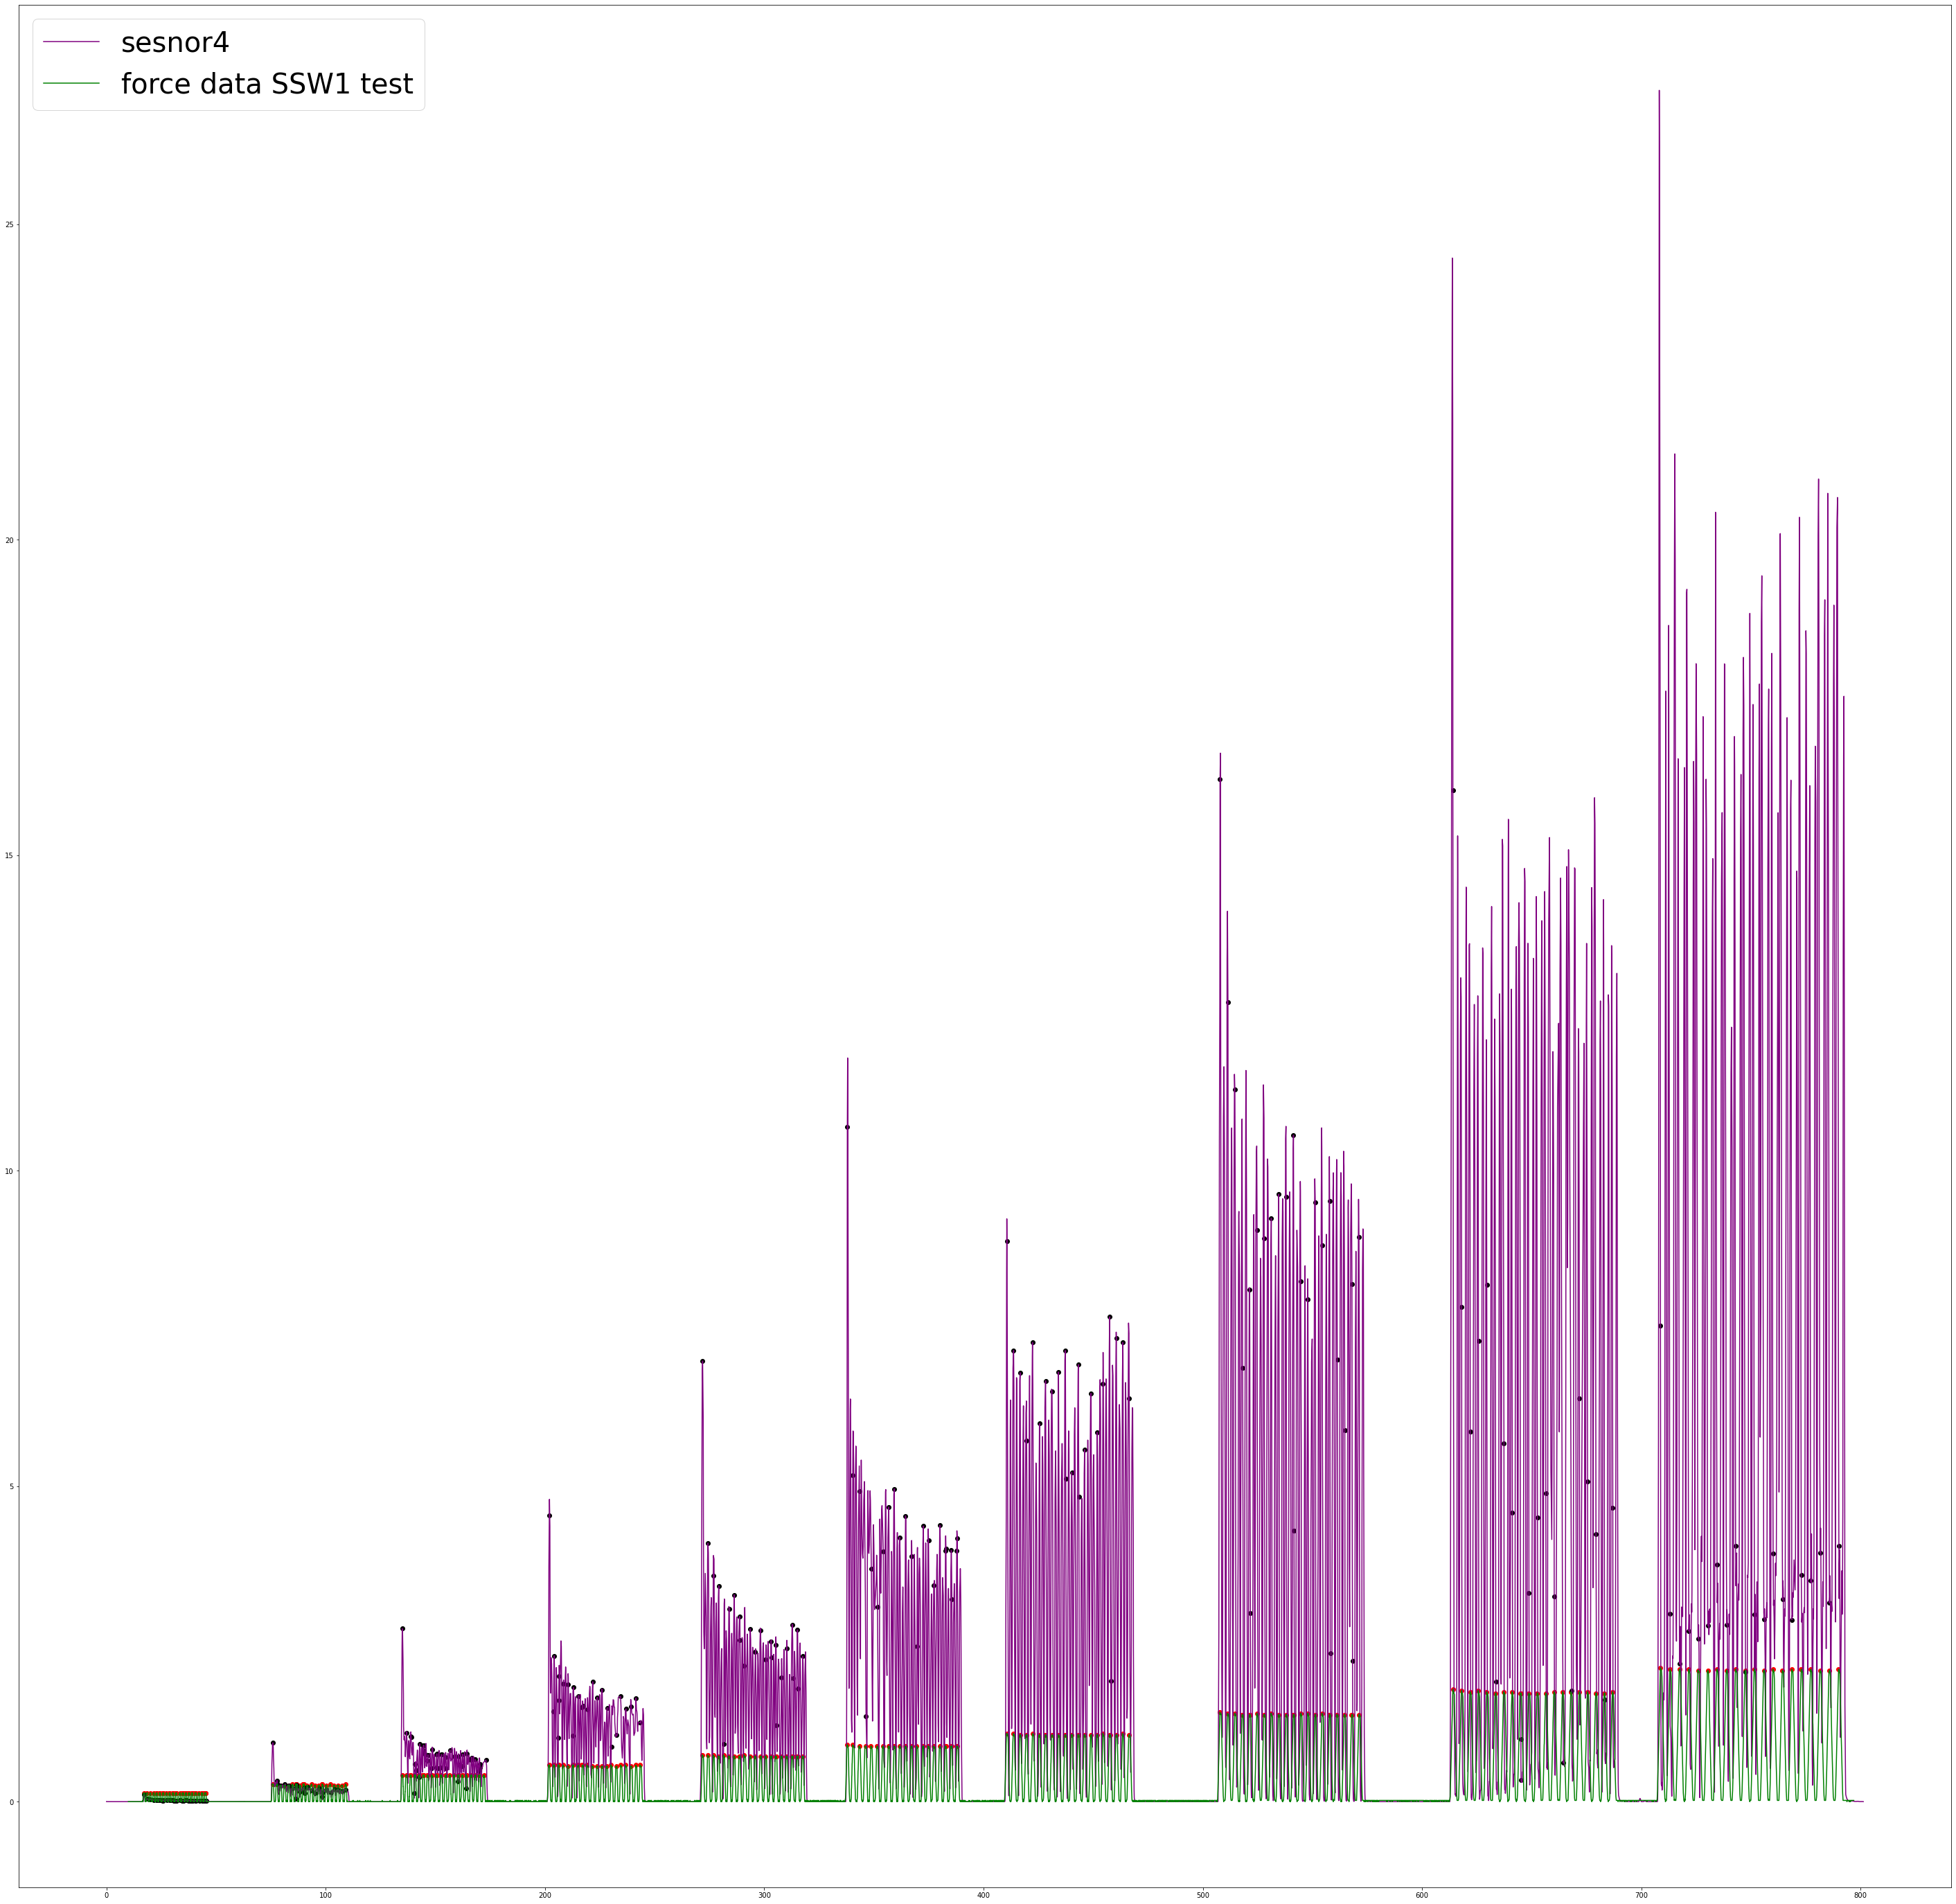

In [17]:
#visualizing and syncing the resistance data for each sensor S 1- 5 - SSW1

plt.figure(figsize=(50, 50))

# plt.plot(SSW1["Unnamed: 0"],SSW1["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SSW1["Unnamed: 0"],SSW1["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SSW1["Unnamed: 0"],SSW1["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SSW1["Unnamed: 0"],SSW1["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SSW1 = x_force_SSW1 + 10
scaled_SSW1 = SSW1["Unnamed: 0"]

plt.plot(scaled_SSW1,SSW1["s4_d"], color = 'purple', label = 'sesnor4')
plt.plot(scaled_x_force_SSW1,Load_SSW1,color = 'green', label = 'force data SSW1 test' )


plt.legend(fontsize=40)


print("Sensor 4 is more profound for SSW1")

#finding the peaks
import bisect
pidx_Load_SSW1, _ = find_peaks(Load_SSW1,prominence= 0.1 )
peaks_Load_SSW1 = Load_SSW1[pidx_Load_SSW1]
peaks_Ltime_SSW1 = scaled_x_force_SSW1[pidx_Load_SSW1]

plt.scatter(peaks_Ltime_SSW1,peaks_Load_SSW1,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SSW1time = []

peaks_Ltime_SSW1.reset_index(drop = True, inplace = True)
peaks_Load_SSW1.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_SSW1)):
    idx_SSW1time.append(bisect.bisect_left(SSW1["Unnamed: 0"], peaks_Ltime_SSW1[i]))

plt.scatter(SSW1["Unnamed: 0"][idx_SSW1time],SSW1["s4_d"][idx_SSW1time],color = 'black')

In [18]:
#Storing the peaks into csv file - SSW1
Load_SSW1peaks =[]

for i in range(len(peaks_Load_SSW1)):
    Load_SSW1peaks.append(peaks_Load_SSW1[i])
    
content_SSW1 = {'R1':SSW1["s1_d"][idx_SSW1time],
              'R2':SSW1["s2_d"][idx_SSW1time],
              'R3':SSW1["s3_d"][idx_SSW1time],
              'R4':SSW1["s4_d"][idx_SSW1time], 
              'Load': Load_SSW1peaks} 

df_SSW1 = pd.DataFrame(content_SSW1, columns = ['R1','R2','R3','R4','Load'])

df_SSW1.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SSW1.csv',index = False, header = True)

Sensor 4 is more profound for SSW2


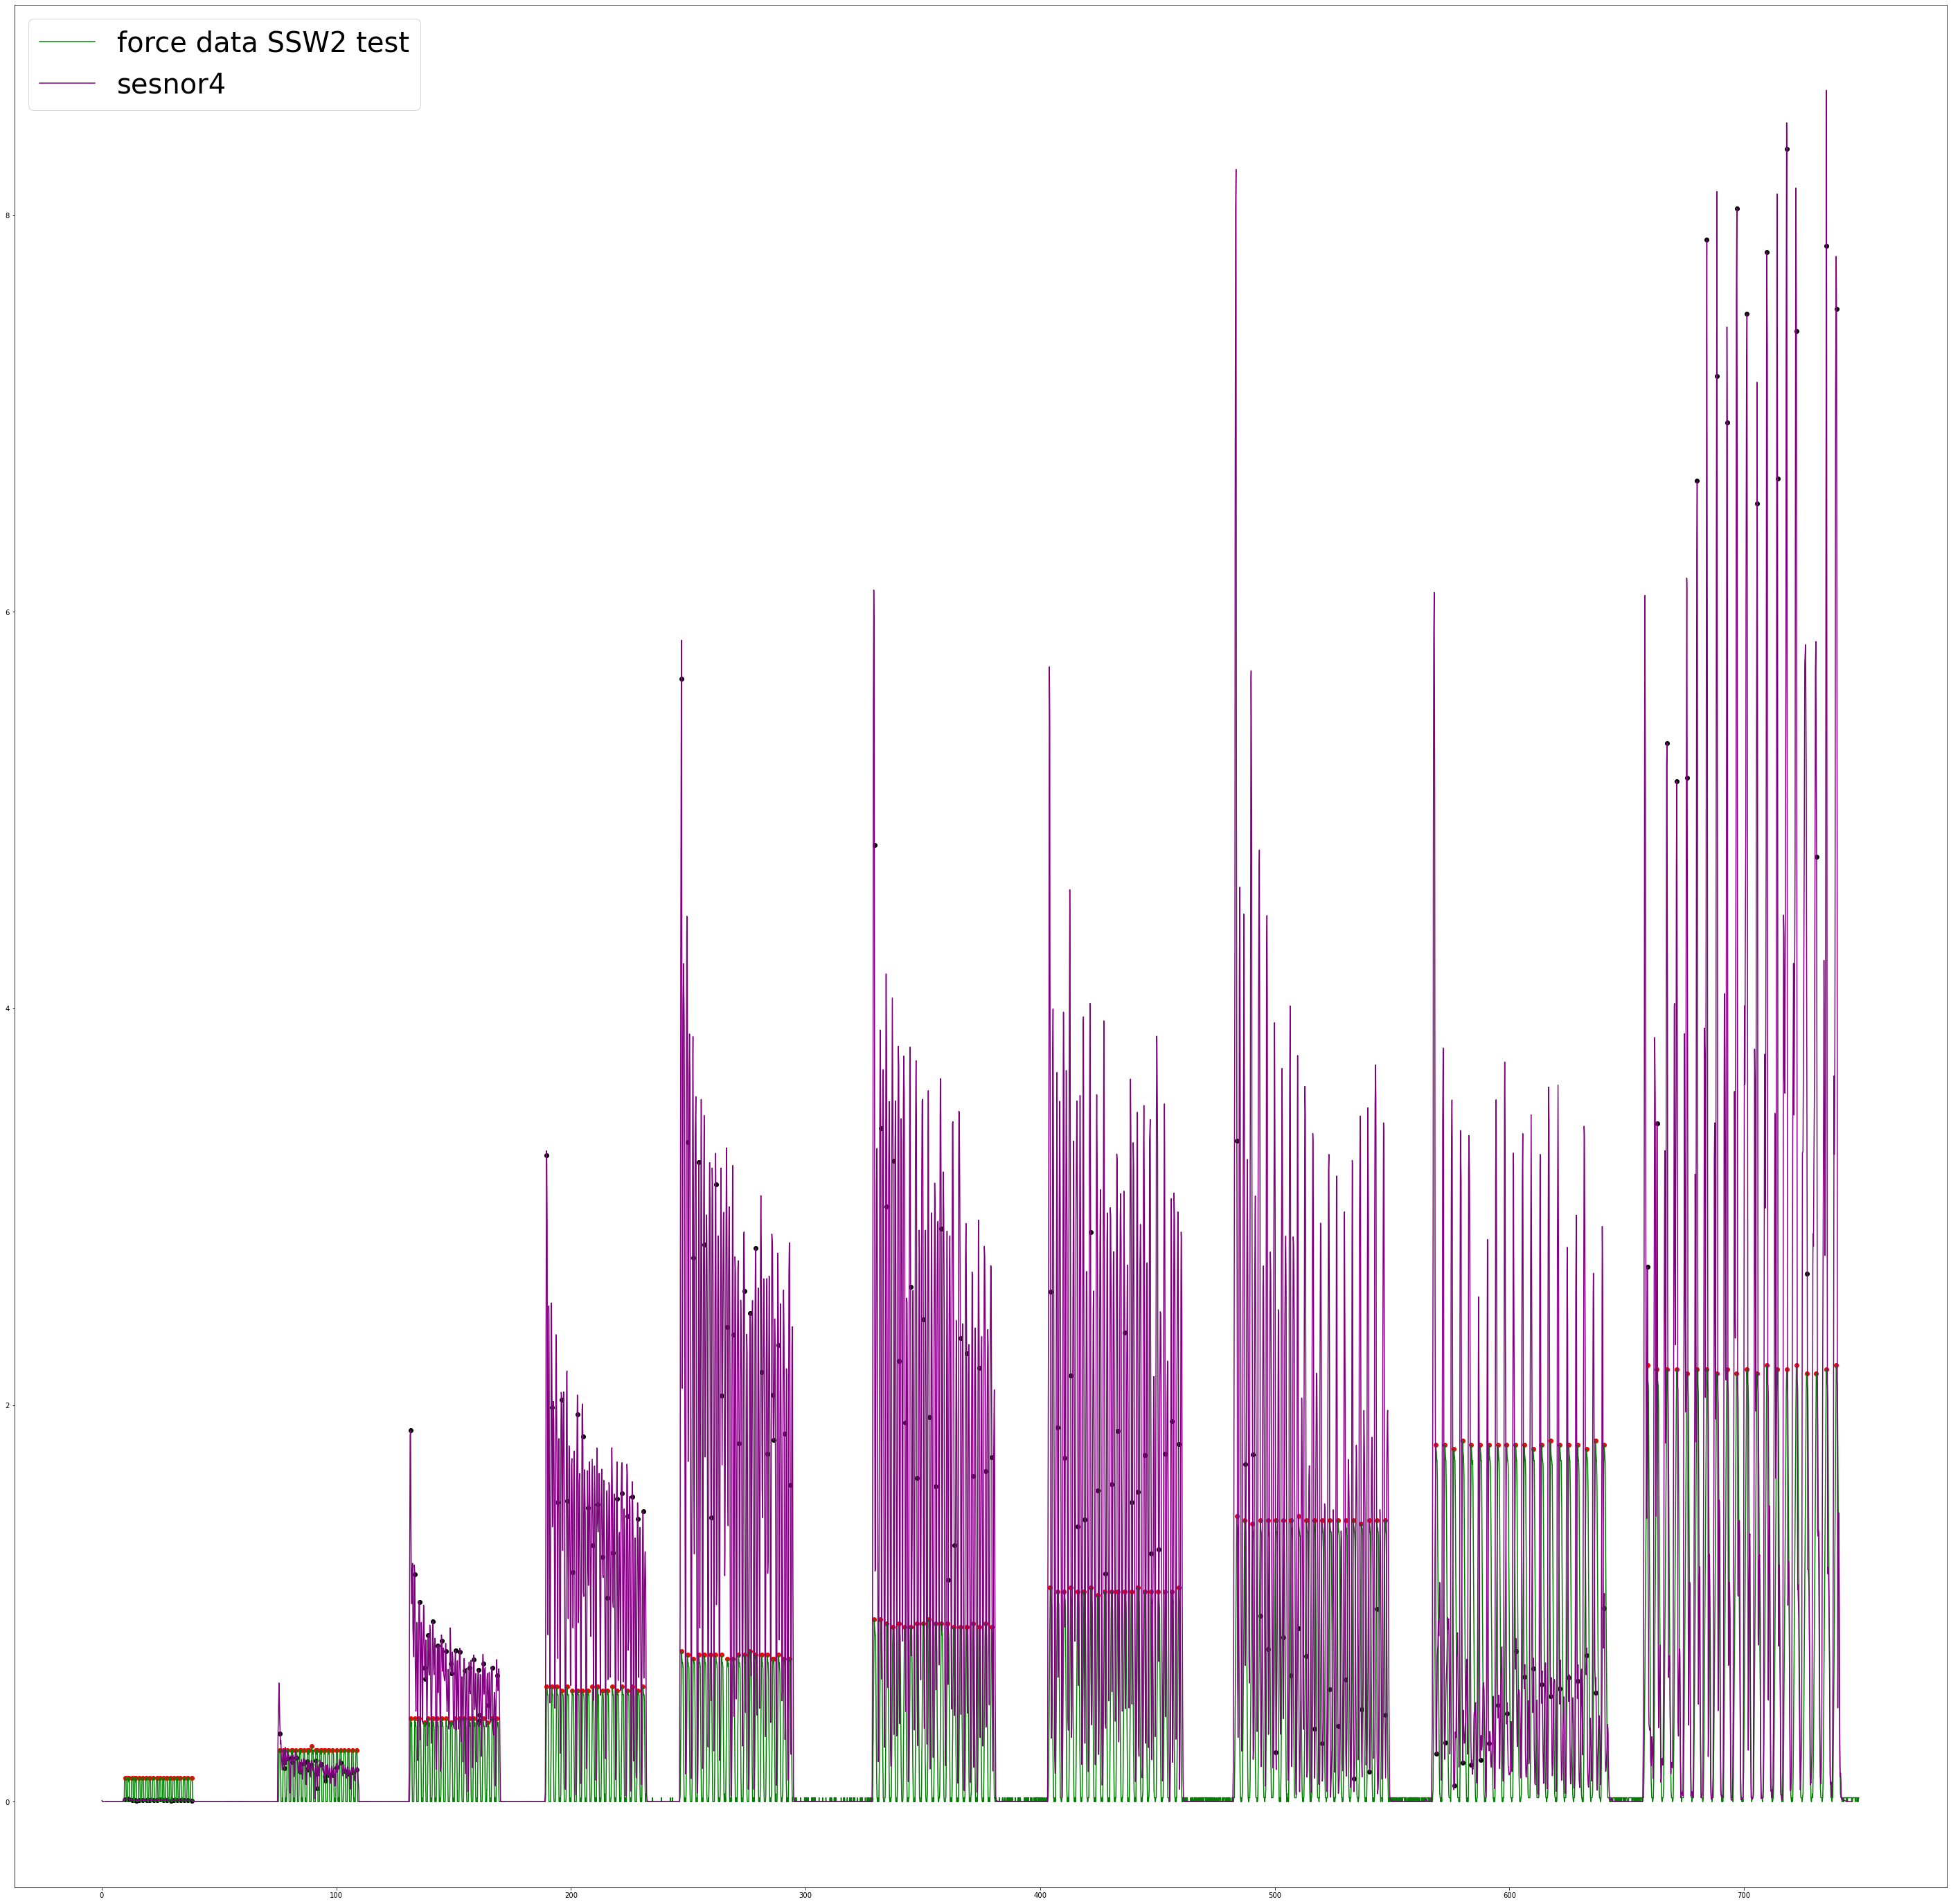

In [25]:
#visualizing and syncing the resistance data for each sensor SW 1- 5 - SSW2

plt.figure(figsize=(50, 50))

# plt.plot(SSW2["Unnamed: 0"],SSW2["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SSW2["Unnamed: 0"],SSW2["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SSW2["Unnamed: 0"],SSW2["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SSW2["Unnamed: 0"],SSW2["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SSW2 = x_force_SSW2 + 1.5
scaled_SSW2 = SSW2["Unnamed: 0"]

plt.plot(scaled_x_force_SSW2,Load_SSW2,color = 'green', label = 'force data SSW2 test' )
plt.plot(scaled_SSW2,SSW2["s4_d"], color = 'purple', label = 'sesnor4')



plt.legend(fontsize=40)


print("Sensor 4 is more profound for SSW2")

#finding the peaks
import bisect
pidx_Load_SSW2, _ = find_peaks(Load_SSW2,prominence= 0.1 )
peaks_Load_SSW2 = Load_SSW2[pidx_Load_SSW2]
peaks_Ltime_SSW2 = scaled_x_force_SSW2[pidx_Load_SSW2]

plt.scatter(peaks_Ltime_SSW2,peaks_Load_SSW2,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SSW2time = []

peaks_Ltime_SSW2.reset_index(drop = True, inplace = True)
peaks_Load_SSW2.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_SSW2)):
    idx_SSW2time.append(bisect.bisect_left(SSW2["Unnamed: 0"], peaks_Ltime_SSW2[i]))

plt.scatter(SSW2["Unnamed: 0"][idx_SSW2time],SSW2["s4_d"][idx_SSW2time],color = 'black')

In [26]:
#Storing the peaks into csv file - SSW2
Load_SSW2peaks =[]

for i in range(len(peaks_Load_SSW2)):
    Load_SSW2peaks.append(peaks_Load_SSW2[i])
    
content_SSW2 = {'R1':SSW2["s1_d"][idx_SSW2time],
              'R2':SSW2["s2_d"][idx_SSW2time],
              'R3':SSW2["s3_d"][idx_SSW2time],
              'R4':SSW2["s4_d"][idx_SSW2time], 
              'Load': Load_SSW2peaks} 

df_SSW2 = pd.DataFrame(content_SSW2, columns = ['R1','R2','R3','R4','Load'])

df_SSW2.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SSW2.csv',index = False, header = True)

In [31]:
#visualizing and syncing the resistance data for each sensor SW 1- 5 - SSW3

plt.figure(figsize=(50, 50))

# plt.plot(SSW3["Unnamed: 0"],SSW3["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SSW3["Unnamed: 0"],SSW3["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SSW3["Unnamed: 0"],SSW3["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SSW3["Unnamed: 0"],SSW3["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SSW3 = x_force_SSW3 + 1
scaled_SSW3 = SSW3["Unnamed: 0"]

plt.plot(scaled_x_force_SSW3,Load_SSW3,color = 'green', label = 'force data SSW3 test' )
plt.plot(scaled_SSW3,SSW3["s2_d"], color = 'red', label = 'sesnor2')



plt.legend(fontsize=40)


print("Sensor 2 is more profound for SSW3")

#finding the peaks

pidx_Load_SSW3, _ = find_peaks(Load_SSW3,prominence= 0.1 )
peaks_Load_SSW3 = Load_SSW3[pidx_Load_SSW3]
peaks_Ltime_SSW3 = scaled_x_force_SSW3[pidx_Load_SSW3]

plt.scatter(peaks_Ltime_SSW3,peaks_Load_SSW3,color = 'purple')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SSW3time = []

peaks_Ltime_SSW3.reset_index(drop = True, inplace = True)
peaks_Load_SSW3.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_SSW3)):
    idx_SSW3time.append(bisect.bisect_left(SSW3["Unnamed: 0"], peaks_Ltime_SSW3[i]))

plt.scatter(SSW3["Unnamed: 0"][idx_SSW3time],SSW3["s2_d"][idx_SSW3time],color = 'black')

Sensor 2 is more profound for SSW3


In [33]:
#Storing the peaks into csv file - SSW3
Load_SSW3peaks =[]

for i in range(len(peaks_Load_SSW3)):
    Load_SSW3peaks.append(peaks_Load_SSW3[i])
    
content_SSW3 = {'R1':SSW3["s1_d"][idx_SSW3time],
              'R2':SSW3["s2_d"][idx_SSW3time],
              'R3':SSW3["s3_d"][idx_SSW3time],
              'R4':SSW3["s4_d"][idx_SSW3time], 
              'Load': Load_SSW3peaks} 

df_SSW3 = pd.DataFrame(content_SSW3, columns = ['R1','R2','R3','R4','Load'])

df_SSW3.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SSW3.csv',index = False, header = True)

In [41]:
#visualizing and syncing the resistance data for each sensor SW 1- 5 - SWW4

plt.figure(figsize=(50, 50))

# plt.plot(SSW4["Unnamed: 0"],SSW4["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SSW4["Unnamed: 0"],SSW4["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SSW4["Unnamed: 0"],SSW4["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SSW4["Unnamed: 0"],SSW4["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SSW4 = x_force_SSW4 + 9
scaled_SSW4 = SSW4["Unnamed: 0"]

plt.plot(scaled_x_force_SSW4,Load_SSW4,color = 'green', label = 'force data SSW4 test' )
# plt.plot(scaled_SSW4,SSW4["s2_d"], color = 'purple', label = 'sesnor2')
plt.plot(scaled_SSW4,SSW4["s4_d"], color = 'purple', label = 'sesnor4')



plt.legend(fontsize=40)


print("Sensor 2 and 4 are more profound for SSW4")

#finding the peaks

pidx_Load_SSW4, _ = find_peaks(Load_SSW4,prominence= 0.1 )
peaks_Load_SSW4 = Load_SSW4[pidx_Load_SSW4]
peaks_Ltime_SSW4 = scaled_x_force_SSW4[pidx_Load_SSW4]

plt.scatter(peaks_Ltime_SSW4,peaks_Load_SSW4,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SSW4time = []

peaks_Ltime_SSW4.reset_index(drop = True, inplace = True)
peaks_Load_SSW4.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_SSW4)):
    idx_SSW4time.append(bisect.bisect_left(SSW4["Unnamed: 0"], peaks_Ltime_SSW4[i]))

plt.scatter(SSW4["Unnamed: 0"][idx_SSW4time],SSW4["s4_d"][idx_SSW4time],color = 'black')

Sensor 2 and 4 are more profound for SSW4


In [42]:
#Storing the peaks into csv file - SSW4
Load_SSW4peaks =[]

for i in range(len(peaks_Load_SSW4)):
    Load_SSW4peaks.append(peaks_Load_SSW4[i])
    
content_SSW4 = {'R1':SSW4["s1_d"][idx_SSW4time],
              'R2':SSW4["s2_d"][idx_SSW4time],
              'R3':SSW4["s3_d"][idx_SSW4time],
              'R4':SSW4["s4_d"][idx_SSW4time], 
              'Load': Load_SSW4peaks} 

df_SSW4 = pd.DataFrame(content_SSW4, columns = ['R1','R2','R3','R4','Load'])

df_SSW4.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SSW4.csv',index = False, header = True)

Sensor 4 is more profound for SSW5


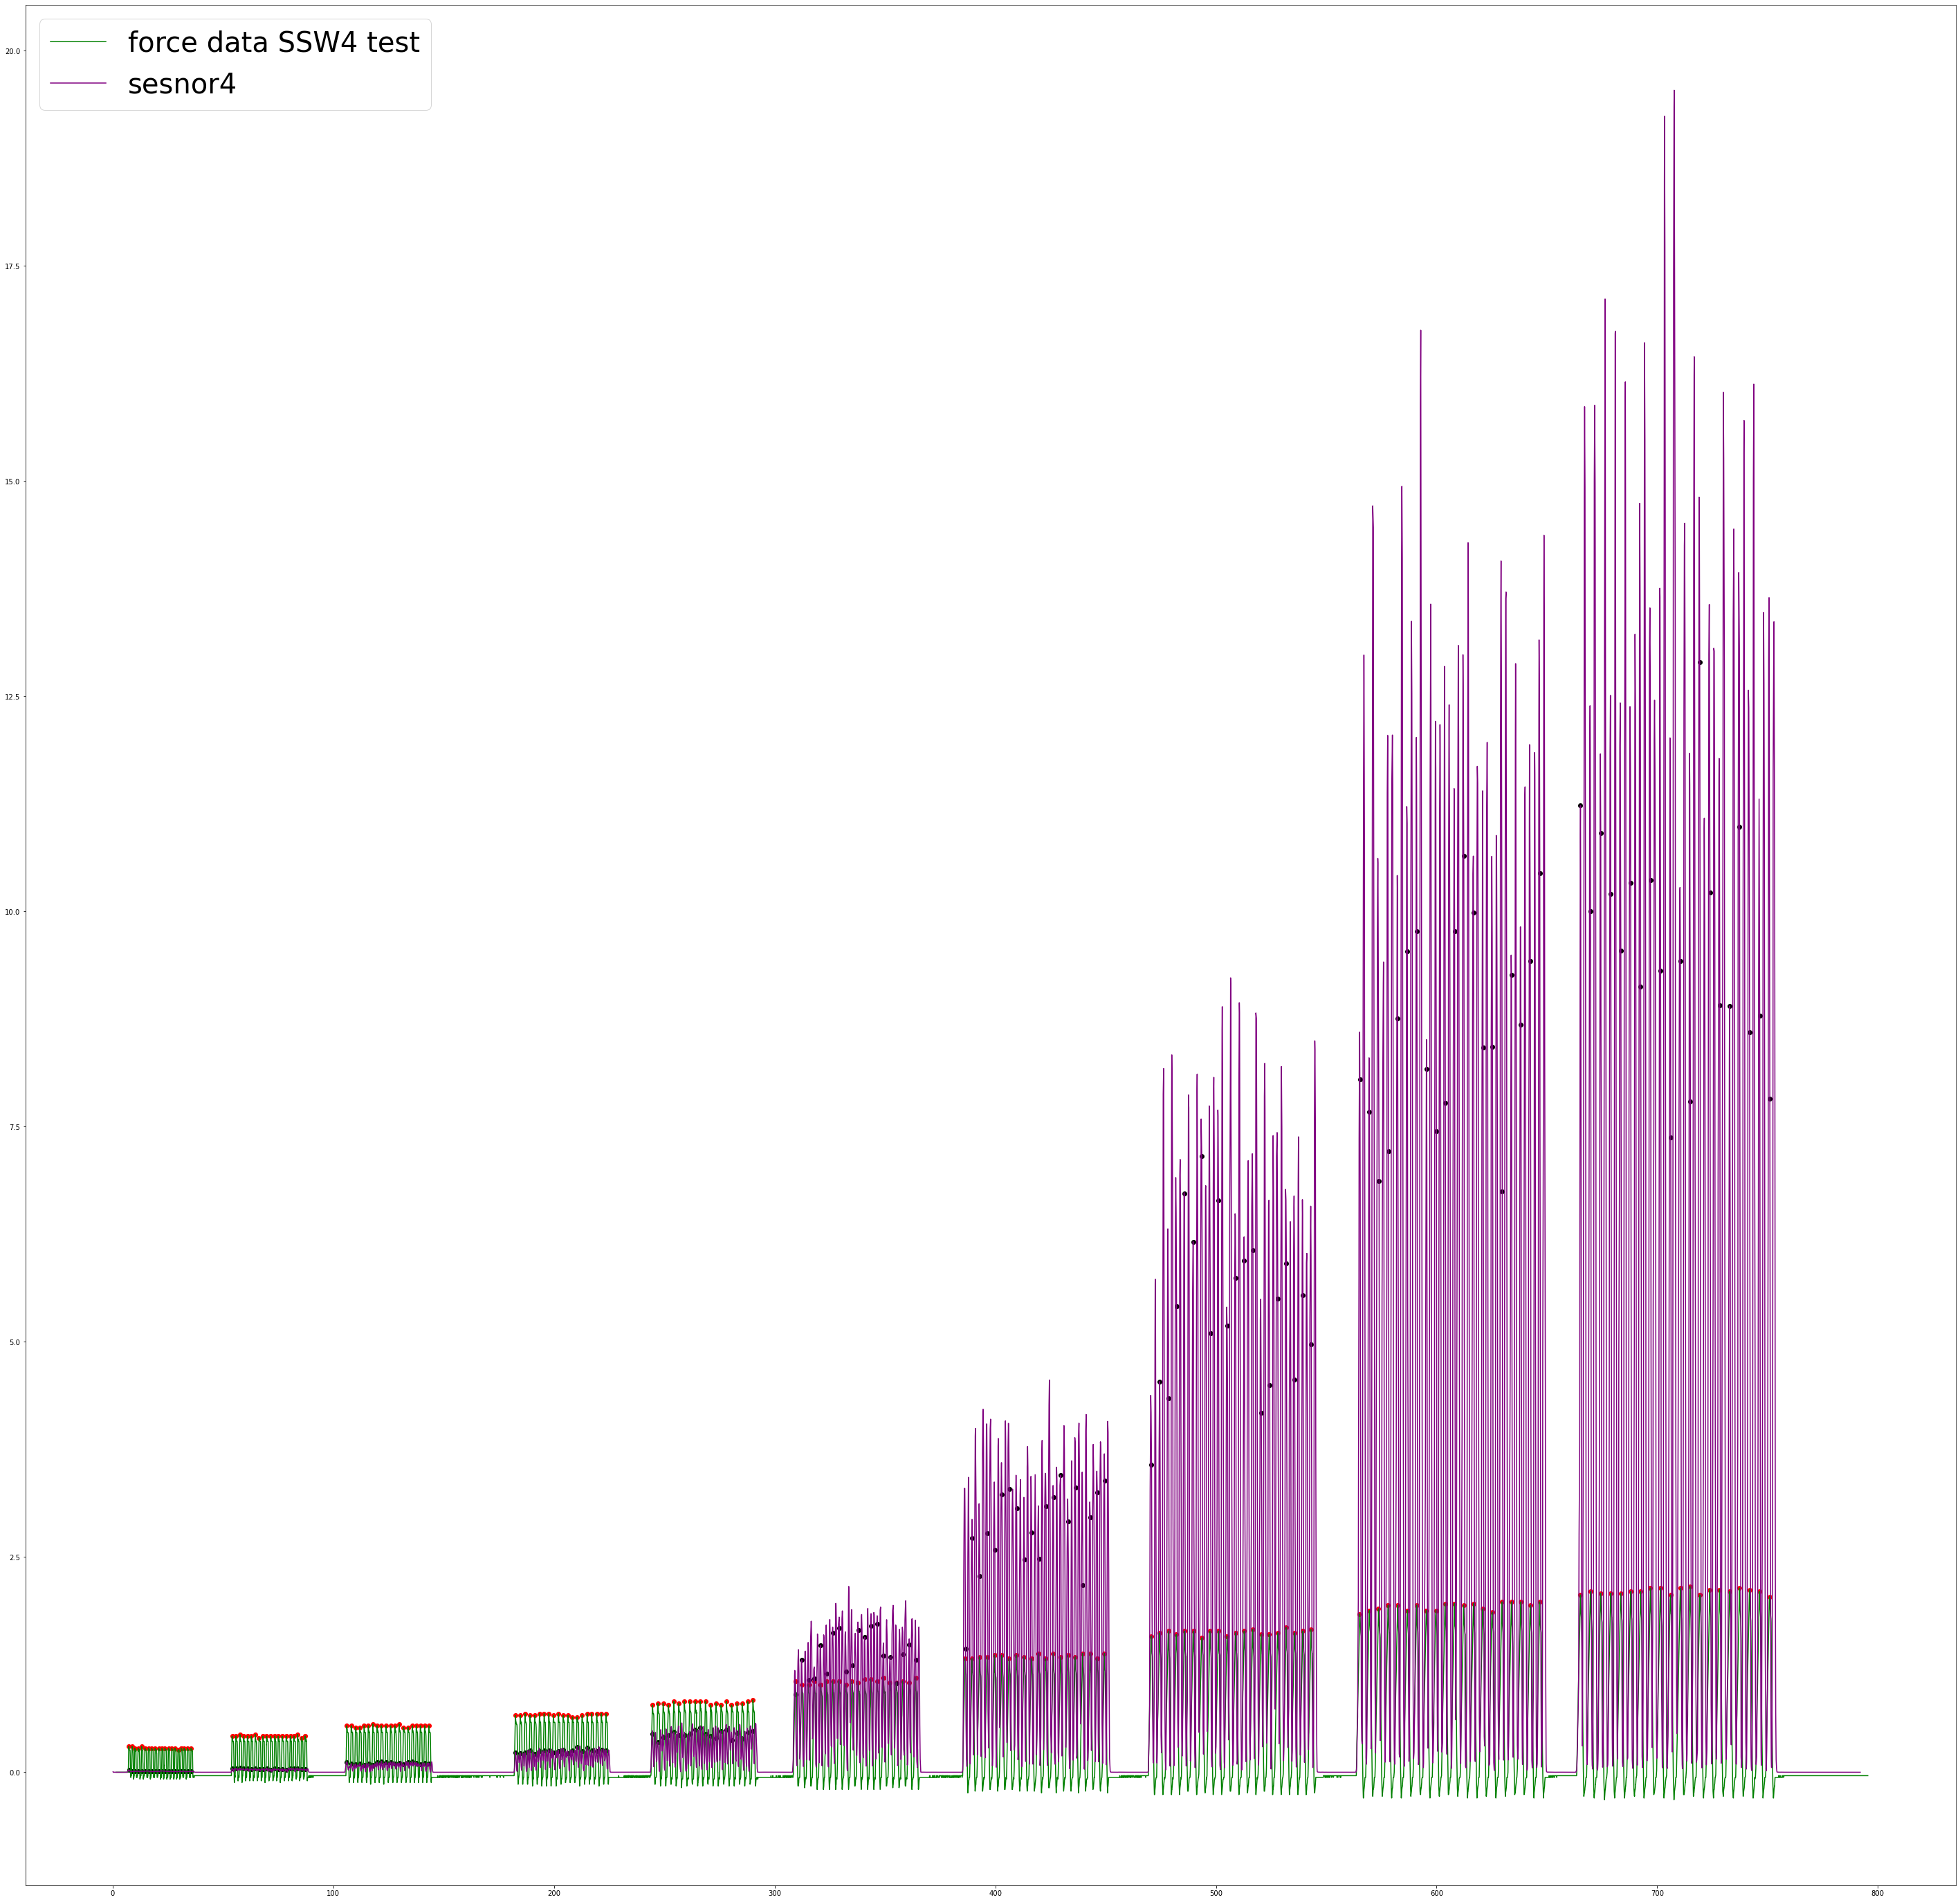

In [46]:
#visualizing and syncing the resistance data for each sensor SW 1- 5 - SWW5

plt.figure(figsize=(50, 50))

# plt.plot(SSW5["Unnamed: 0"],SSW5["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SSW5["Unnamed: 0"],SSW5["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SSW5["Unnamed: 0"],SSW5["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SSW5["Unnamed: 0"],SSW5["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SSW5 = x_force_SSW5 + 1.5
scaled_SSW5 = SSW5["Unnamed: 0"]

plt.plot(scaled_x_force_SSW5,Load_SSW5,color = 'green', label = 'force data SSW4 test' )
plt.plot(scaled_SSW5,SSW5["s4_d"], color = 'purple', label = 'sesnor4')



plt.legend(fontsize=40)


print("Sensor 4 is more profound for SSW5")

#finding the peaks

pidx_Load_SSW5, _ = find_peaks(Load_SSW5,prominence= 0.1 )
peaks_Load_SSW5 = Load_SSW5[pidx_Load_SSW5]
peaks_Ltime_SSW5 = scaled_x_force_SSW5[pidx_Load_SSW5]

plt.scatter(peaks_Ltime_SSW5,peaks_Load_SSW5,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SSW5time = []

peaks_Ltime_SSW5.reset_index(drop = True, inplace = True)
peaks_Load_SSW5.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_SSW5)):
    idx_SSW5time.append(bisect.bisect_left(SSW5["Unnamed: 0"], peaks_Ltime_SSW5[i]))

plt.scatter(SSW5["Unnamed: 0"][idx_SSW5time],SSW5["s4_d"][idx_SSW5time],color = 'black')

In [47]:
#Storing the peaks into csv file - SSW5
Load_SSW5peaks =[]

for i in range(len(peaks_Load_SSW5)):
    Load_SSW5peaks.append(peaks_Load_SSW5[i])
    
content_SSW5 = {'R1':SSW5["s1_d"][idx_SSW5time],
              'R2':SSW5["s2_d"][idx_SSW5time],
              'R3':SSW5["s3_d"][idx_SSW5time],
              'R4':SSW5["s4_d"][idx_SSW5time], 
              'Load': Load_SSW5peaks} 

df_SSW5 = pd.DataFrame(content_SSW5, columns = ['R1','R2','R3','R4','Load'])

df_SSW5.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SSW5.csv',index = False, header = True)